In [1]:
!pip install plot_ellipse

In [2]:
!jupyter labextension list

JupyterLab v4.0.5
/Users/daiyijia/miniconda3/share/jupyter/labextensions
        jupyterlab_pygments v0.2.2 enabled  X (python, jupyterlab_pygments)
        jupyter-matplotlib v0.11.3 enabled OK
        @jupyter-widgets/jupyterlab-manager v5.0.8 enabled OK (python, jupyterlab_widgets)


   The following extensions are outdated:
        jupyterlab_pygments
        
   Consider checking if an update is available for these packages.



# Linear Contextual Bandits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils_linear import LinearRewardHistory, update_plot, InteractivePlot, LinearContextualBandit

In [2]:
%matplotlib widget

In [3]:
mab = LinearContextualBandit(K=3)

In [4]:
hist = LinearRewardHistory(np.arange(mab.K), mab.d)

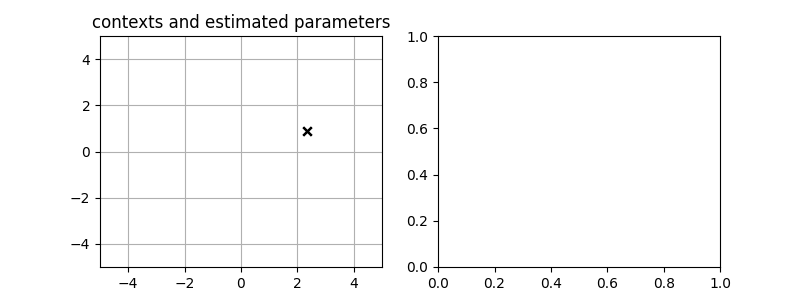

In [5]:
fig, axs = plt.subplots(1,2,figsize=[8, 3])
plotter = InteractivePlot(mab, hist, axs)
display(plotter.combined)

# Weighted Linear Contextual Bandits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils_linear import WeightedLinearRewardHistory, update_plot, InteractivePlot, WeightedLinearContextualBandit

In [2]:
%matplotlib widget

In [3]:
mab = WeightedLinearContextualBandit(K=3)

In [4]:
hist = WeightedLinearRewardHistory(np.arange(mab.K), mab.d)

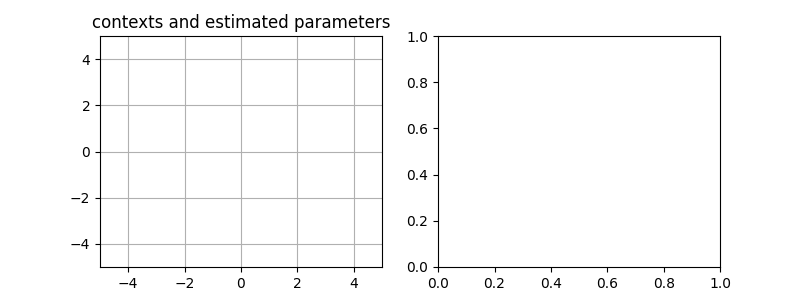

In [5]:
fig, axs = plt.subplots(1,2,figsize=[8, 3])
plotter = InteractivePlot(mab, hist, axs)
display(plotter.combined)

# Logistic Contextual Bandits

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from utils_logistic import LogisticRewardHistory, update_plot, InteractivePlot, LogisticContextualBandit, AutoExperiment

In [9]:
%matplotlib widget

In [10]:
mab = LogisticContextualBandit(K=1)

In [11]:
hist = LogisticRewardHistory(mab.K, mab.rng, mab.d)

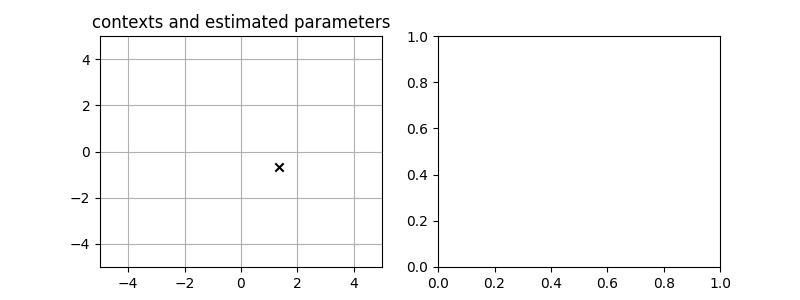

In [12]:
fig, axs = plt.subplots(1,2,figsize=[8, 3])
plotter = InteractivePlot(mab, hist, axs)
display(plotter.combined)

# Logistic Contextual Bandits Automated ECOLog

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from utils_logistic import LogisticRewardHistory, LogisticContextualBandit, AutoExperiment

In [14]:
mab = LogisticContextualBandit(K=3)

In [15]:
hist = LogisticRewardHistory(mab.K, mab.rng, mab.d)

In [16]:
runner = AutoExperiment(mab, hist, 2000, 20)

In [17]:
reward, regret = runner.run()

TypeError: object of type 'int' has no len()

In [ ]:
plt.plot(regret)

# Logistic Contextual Semi-Bandits Automated ECOLog

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils_logistic import LogisticRewardHistoryRanking, LogisticContextualBanditRanking, AutoExperimentRanking

In [ ]:
mab = LogisticContextualBanditRanking(K=5, top_k=2)

In [ ]:
hist = LogisticRewardHistoryRanking(mab.K, mab.rng, mab.d, mab.top_k, mab.rank_weight)

In [ ]:
runner = AutoExperimentRanking(mab, hist, 500, warm_up=20)

In [ ]:
reward, regret = runner.run()

In [ ]:
plt.plot(regret)

# Logistic Contextual Bandits with Ranking Automated ECOLog

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils_logistic import LogisticRewardHistoryRanking, LogisticContextualBanditRanking, AutoExperimentRanking

In [ ]:
mab = LogisticContextualBanditRanking(K=5)

In [ ]:
hist = LogisticRewardHistoryRanking(mab.K, mab.rng, mab.d, mab.top_k, mab.rank_weight)

In [ ]:
runner = AutoExperimentRanking(mab, hist, 500, warm_up=2)

In [ ]:
reward, regret = runner.run()

In [ ]:
plt.plot(regret)

# Confidence Radius with Ranking Automated ECOLog

# Random Context

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils_logistic import LogisticRewardHistoryRanking, LogisticContextualBanditRanking, AutoExperimentRanking

In [ ]:
mab = LogisticContextualBanditRanking(K=5, top_k=None)

In [ ]:
hist = LogisticRewardHistoryRanking(mab.K, mab.rng, mab.d, mab.top_k, mab.rank_weight)

In [ ]:
runner = AutoExperimentRanking(mab, hist, 1000, warm_up=5)

In [ ]:
estimate_hists, bonus_hists, ground_truth_hists, reward_hist, regret_hist = runner.estimate_with_bonus()

In [ ]:
# fig, ax = plt.subplots()
cmap_list = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
cmap = mpl.colormaps['plasma']
for j in range(mab.K):
    fig, ax = plt.subplots()
    time = np.array([i for i in range(0, len(estimate_hists[j]))])
    opt = np.array([estimate_hists[j][i][1]+bonus_hists[j][i][1] for i in range(0, len(estimate_hists[j]))])
    est = np.array([estimate_hists[j][i][1] for i in range(0, len(estimate_hists[j]))])
    gt = np.array([ground_truth_hists[j][i][1] for i in range(0, len(estimate_hists[j]))])
    rank = np.array([estimate_hists[j][i][0] for i in range(0, len(estimate_hists[j]))])
    for pos in np.unique(rank):
        ix = np.where(rank == pos)
        ax.scatter(time[ix], opt[ix], color=cmap(pos/4), alpha=0.5, s=7, label=pos)
        ax.scatter(time[ix], est[ix], color=cmap(pos/4), alpha=0.2, s=5)
        ax.scatter(time[ix], gt[ix], marker="*", color=cmap(pos/4), alpha=1, s=5)
    plt.title("Arm "+str(j))
    ax.legend()

In [ ]:
plt.plot(regret_hist)

In [ ]:
xs = [mu[0] for mu in mab.mus]
ys = [mu[1] for mu in mab.mus]
plt.scatter(xs, ys, marker="*", c=[i for i in range(len(xs))])

# Cyclic Context

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils_logistic import LogisticRewardHistoryRanking, LogisticContextualBanditRanking, AutoExperimentRanking

In [2]:
# mus = None
mus = [[-1.10912794, -0.88806208], [-0.26825734, -0.11610864], [0.52413642, 0.64979299], [0.71140775, 1.13856202], [-1.51576932, -0.31137061]]
mab = LogisticContextualBanditRanking(K=5, top_k=None, mus=mus, rank_weight=True)

In [3]:
hist = LogisticRewardHistoryRanking(mab.K, mab.rng, mab.d, mab.top_k, mab.rank_weight)

In [4]:
runner = AutoExperimentRanking(mab, hist, 6000, warm_up=7, cyclic=True)

In [5]:
estimate_hists, bonus_hists, ground_truth_hists, reward_hist, regret_hist = runner.estimate_with_bonus()

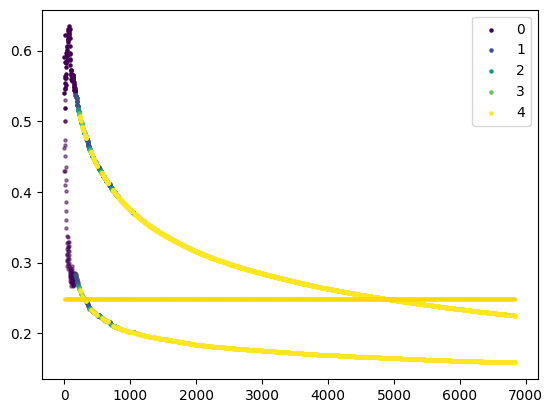

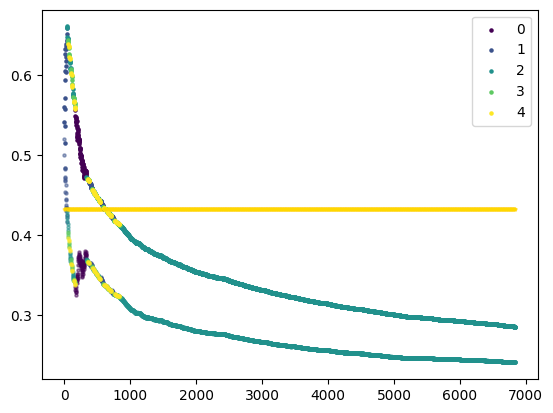

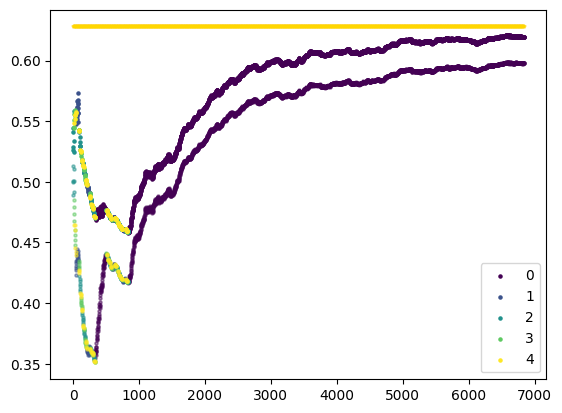

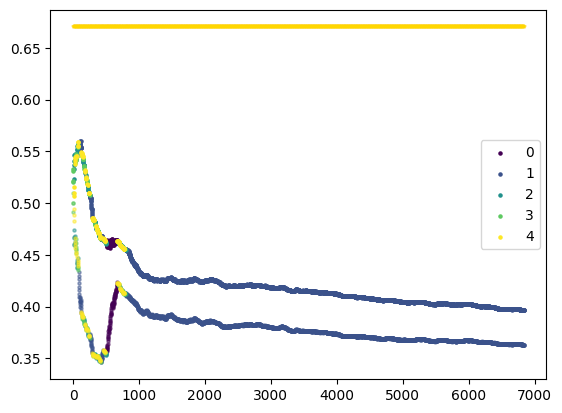

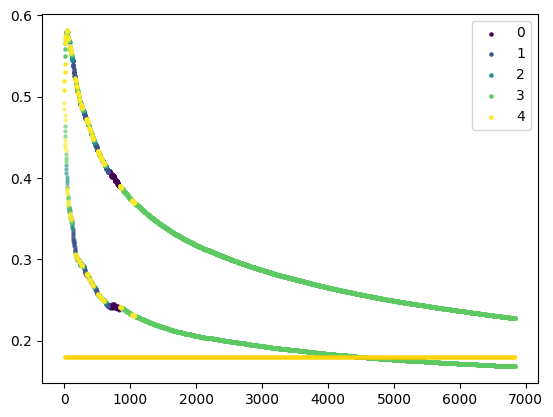

In [6]:
# fig, ax = plt.subplots()
cmap_list = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'summer']
cmap = mpl.colormaps[cmap_list[0]]
for j in range(mab.K):
    fig, ax = plt.subplots()
    time_even = np.array([i for i in range(0, len(estimate_hists[j]), 2)])
    opt_even = np.array([estimate_hists[j][i][1]+bonus_hists[j][i][1] for i in range(0, len(estimate_hists[j]), 2)])
    est_even = np.array([estimate_hists[j][i][1] for i in range(0, len(estimate_hists[j]), 2)])
    gt_even = np.array([ground_truth_hists[j][i][1] for i in range(0, len(estimate_hists[j]), 2)])
    rank_even = np.array([estimate_hists[j][i][0] for i in range(0, len(estimate_hists[j]), 2)])
    for pos in np.unique(rank_even):
        ix = np.where(rank_even == pos)
        if pos == -1:
            ax.scatter(time_even[ix], opt_even[ix], color='grey', alpha=0.1, s=5, label=pos)
            ax.scatter(time_even[ix], est_even[ix], color='grey', alpha=0.1, s=5)
            ax.scatter(time_even[ix], gt_even[ix], marker="*", c='gold', alpha=0.2, s=5)
        else:
            ax.scatter(time_even[ix], opt_even[ix], color= cmap(pos/4), alpha=1, s=5, label=pos)
            ax.scatter(time_even[ix], est_even[ix], color= cmap(pos/4), alpha=0.5, s=5)
            ax.scatter(time_even[ix], gt_even[ix], marker="*", c='gold', alpha=0.2, s=5)
    ax.legend()

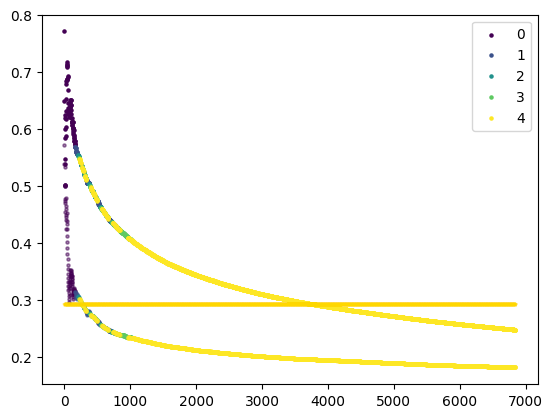

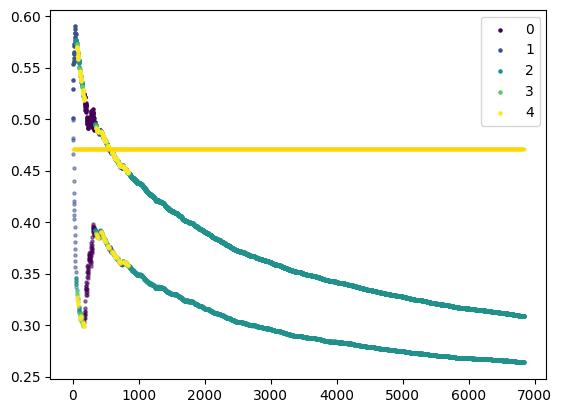

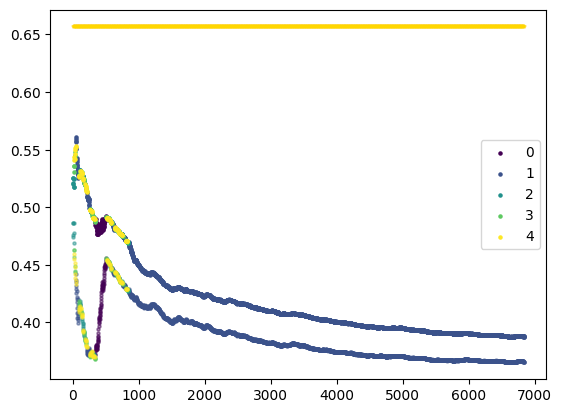

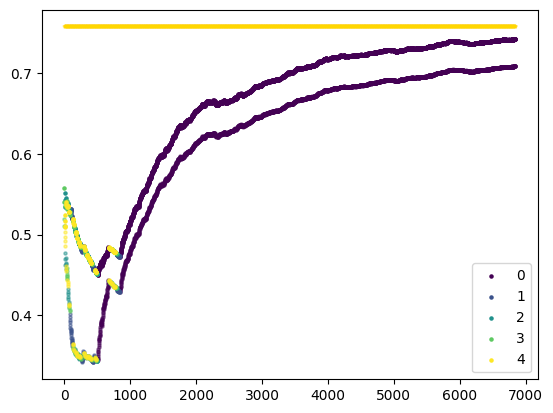

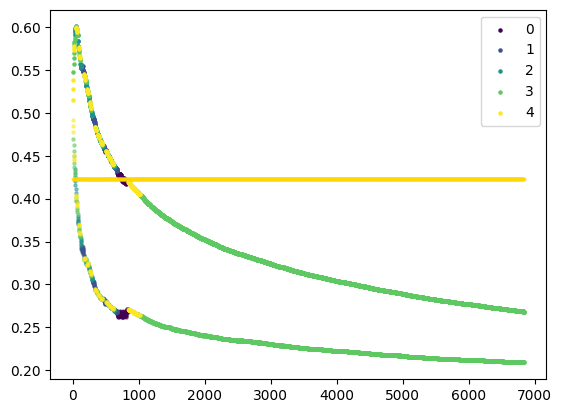

In [7]:
# fig, ax = plt.subplots()
for j in range(mab.K):
    fig, ax = plt.subplots()
    time_odd = np.array([i for i in range(1, len(estimate_hists[j]), 2)])
    opt_odd = np.array([estimate_hists[j][i][1]+bonus_hists[j][i][1] for i in range(1, len(estimate_hists[j]), 2)])
    est_odd = np.array([estimate_hists[j][i][1] for i in range(1, len(estimate_hists[j]), 2)])
    gt_odd = np.array([ground_truth_hists[j][i][1] for i in range(1, len(estimate_hists[j]), 2)])
    rank_odd = np.array([estimate_hists[j][i][0] for i in range(1, len(estimate_hists[j]), 2)])
    for pos in np.unique(rank_odd):
        ix = np.where(rank_odd == pos)
        if pos == -1:
            ax.scatter(time_odd[ix], opt_odd[ix], color='grey', alpha=0.1, s=5, label=pos)
            ax.scatter(time_odd[ix], est_odd[ix], color='grey', alpha=0.1, s=5)
            ax.scatter(time_odd[ix], gt_odd[ix], marker="*", c='gold', alpha=0.2, s=5)
        else:
            ax.scatter(time_odd[ix], opt_odd[ix], color=cmap(pos/4), alpha=1, s=5, label=pos)
            ax.scatter(time_odd[ix], est_odd[ix], color=cmap(pos/4), alpha=0.5, s=5)
            ax.scatter(time_odd[ix], gt_odd[ix], marker="*", c='gold', alpha=0.2, s=5)
    ax.legend()

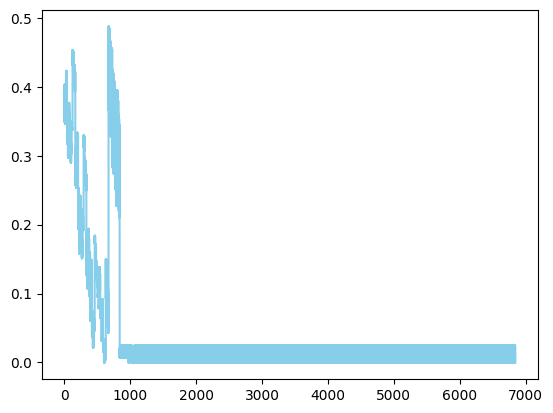

In [8]:
plt.plot(regret_hist, c='skyblue')

[[-1.10912794, -0.88806208], [-0.26825734, -0.11610864], [0.52413642, 0.64979299], [0.71140775, 1.13856202], [-1.51576932, -0.31137061]]


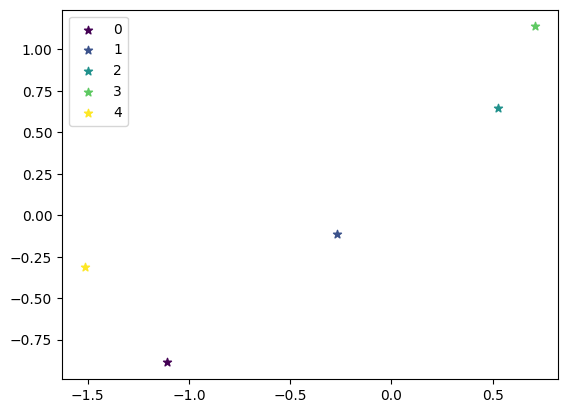

In [9]:
fig, ax = plt.subplots()
for i in range(len(mab.mus)):
    ax.scatter(mab.mus[i][0], mab.mus[i][1], marker="*", color=cmap(i/4), label=i)
ax.legend()
print(mab.mus)

# Logistic Contextual Bandits with Ranking Offline Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils_logistic import LogisticRewardHistoryRanking, LogisticContextualBanditRanking, AutoExperimentRanking, OfflineLearning, AutoExperimentRankingOffline

In [2]:
# mus = None
mus = [[-1.10912794, -0.88806208], [-0.26825734, -0.11610864], [0.52413642, 0.64979299], [0.71140775, 1.13856202], [-1.51576932, -0.31137061]]
mab = LogisticContextualBanditRanking(K=5, top_k=None, mus=mus, rank_weight=False)

In [3]:
hist = LogisticRewardHistoryRanking(mab.K, mab.rng, mab.d, mab.top_k, mab.rank_weight)

In [4]:
runner = AutoExperimentRanking(mab, hist, 5000, warm_up=5, cyclic=True)

In [5]:
estimate_hists, bonus_hists, ground_truth_hists, reward_hist, regret_hist = runner.estimate_with_bonus()

In [6]:
offline_hist = hist.history

In [7]:
mab = mab = LogisticContextualBanditRanking(K=5, top_k=None, mus=mus, rank_weight=True)

In [8]:
new_hist = OfflineLearning(mab.K, mab.rng, mab.d, mab.top_k, mab.rank_weight, offline_hist)

In [9]:
new_runner = AutoExperimentRankingOffline(mab, new_hist, cyclic=True)

In [10]:
new_estimate_hists, new_bonus_hists, new_ground_truth_hists, new_reward_hist, new_regret_hist = new_runner.estimate_with_bonus()

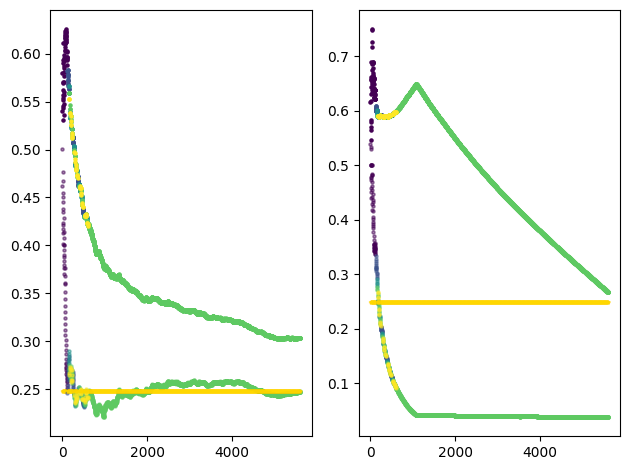

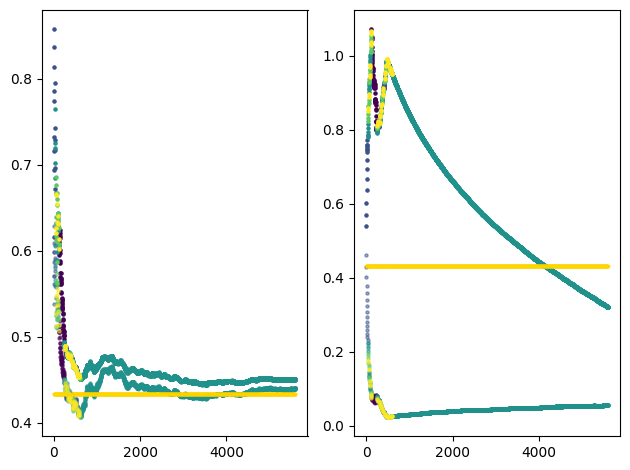

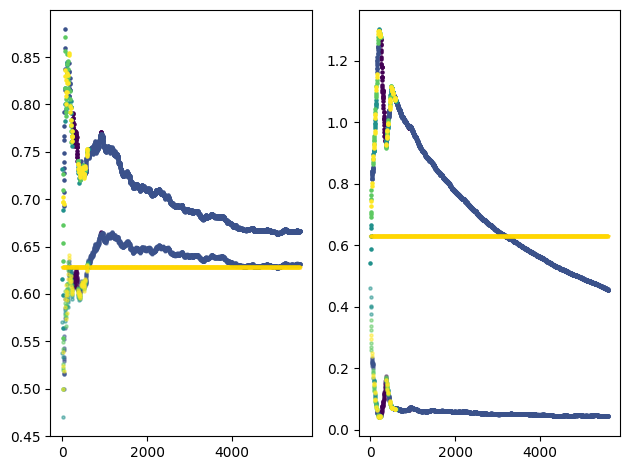

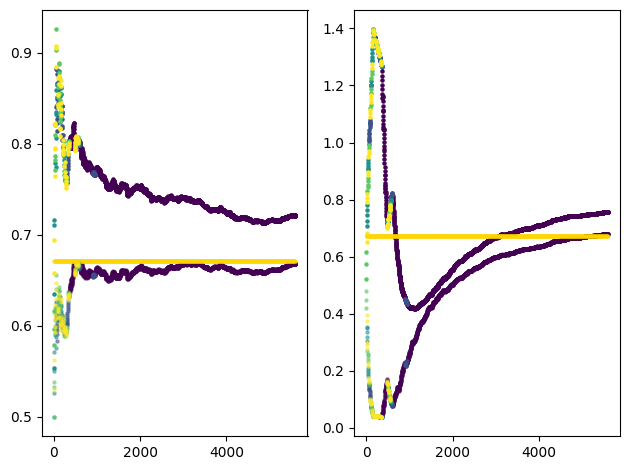

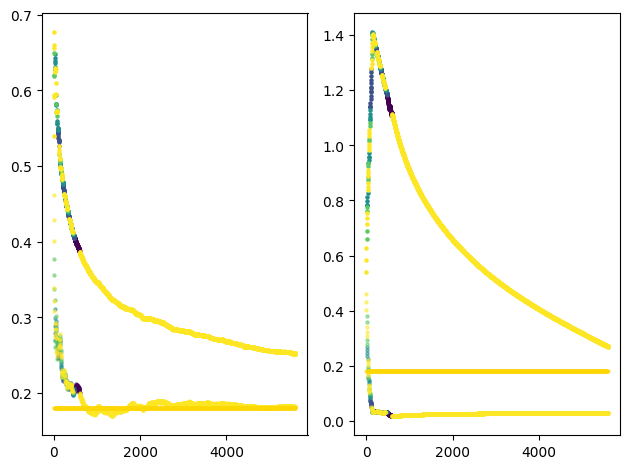

In [19]:
# fig, ax = plt.subplots()
cmap_list = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'summer']
cmap = mpl.colormaps[cmap_list[0]]
for j in range(mab.K):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    time_even = np.array([i for i in range(0, len(estimate_hists[j]), 2)])
    opt_even = np.array([estimate_hists[j][i][1]+bonus_hists[j][i][1] for i in range(0, len(estimate_hists[j]), 2)])
    est_even = np.array([estimate_hists[j][i][1] for i in range(0, len(estimate_hists[j]), 2)])
    gt_even = np.array([ground_truth_hists[j][i][1] for i in range(0, len(estimate_hists[j]), 2)])
    rank_even = np.array([estimate_hists[j][i][0] for i in range(0, len(estimate_hists[j]), 2)])
    new_time_even = np.array([i for i in range(0, len(new_estimate_hists[j]), 2)])
    new_opt_even = np.array([new_estimate_hists[j][i][1]+new_bonus_hists[j][i][1] for i in range(0, len(new_estimate_hists[j]), 2)])
    new_est_even = np.array([new_estimate_hists[j][i][1] for i in range(0, len(new_estimate_hists[j]), 2)])
    new_gt_even = np.array([new_ground_truth_hists[j][i][1] for i in range(0, len(new_estimate_hists[j]), 2)])
    new_rank_even = np.array([new_estimate_hists[j][i][0] for i in range(0, len(new_estimate_hists[j]), 2)])
    for pos in np.unique(rank_even):
        ix = np.where(rank_even == pos)
        if pos == -1:
            ax[0].scatter(time_even[ix], opt_even[ix], color='grey', alpha=0.1, s=5, label=pos)
            ax[0].scatter(time_even[ix], est_even[ix], color='grey', alpha=0.1, s=5)
            ax[0].scatter(time_even[ix], gt_even[ix], marker="*", c='gold', alpha=0.2, s=5)
        else:
            ax[0].scatter(time_even[ix], opt_even[ix], color= cmap(pos/4), alpha=1, s=5, label=pos)
            ax[0].scatter(time_even[ix], est_even[ix], color= cmap(pos/4), alpha=0.5, s=5)
            ax[0].scatter(time_even[ix], gt_even[ix], marker="*", c='gold', alpha=0.2, s=5)
    for pos in np.unique(new_rank_even):
        ix = np.where(new_rank_even == pos)
        if pos == -1:
            ax[1].scatter(new_time_even[ix], new_opt_even[ix], color='grey', alpha=0.1, s=5, label=pos)
            ax[1].scatter(new_time_even[ix], new_est_even[ix], color='grey', alpha=0.1, s=5)
            ax[1].scatter(new_time_even[ix], new_gt_even[ix], marker="*", c='gold', alpha=0.2, s=5)
        else:
            ax[1].scatter(new_time_even[ix], new_opt_even[ix], color= cmap(pos/4), alpha=1, s=5, label=pos)
            ax[1].scatter(new_time_even[ix], new_est_even[ix], color= cmap(pos/4), alpha=0.5, s=5)
            ax[1].scatter(new_time_even[ix], new_gt_even[ix], marker="*", c='gold', alpha=0.2, s=5)
    fig.tight_layout()

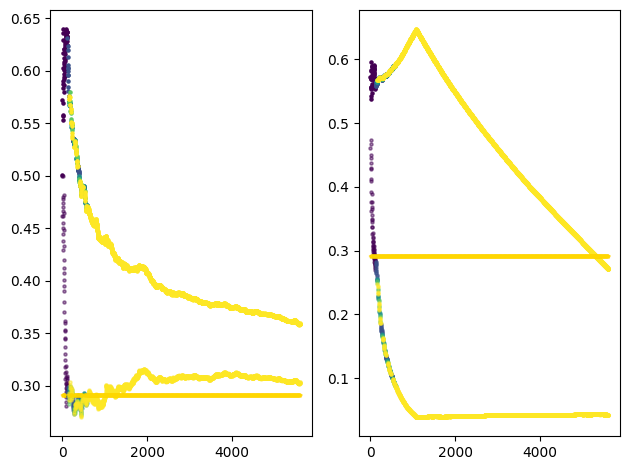

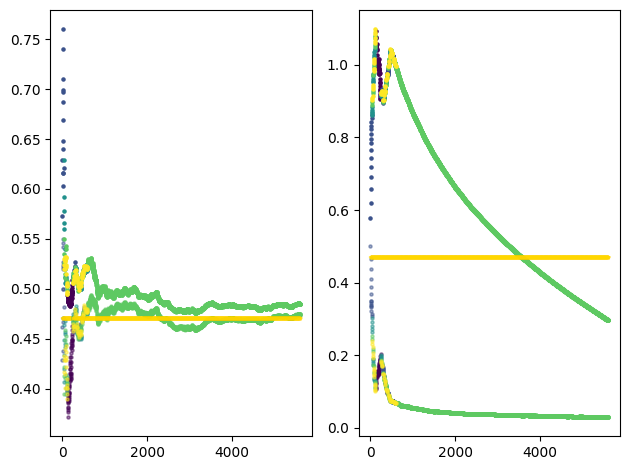

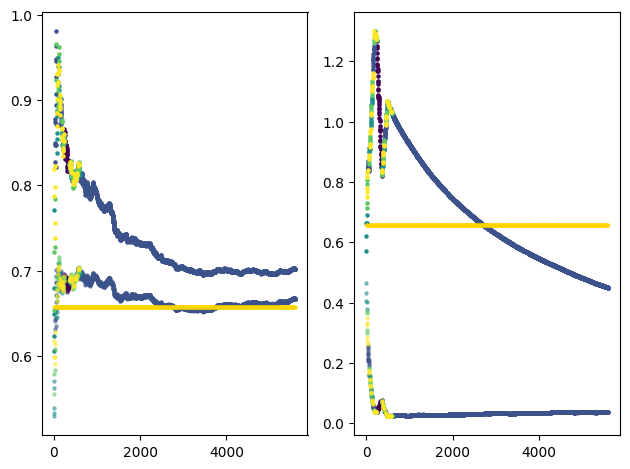

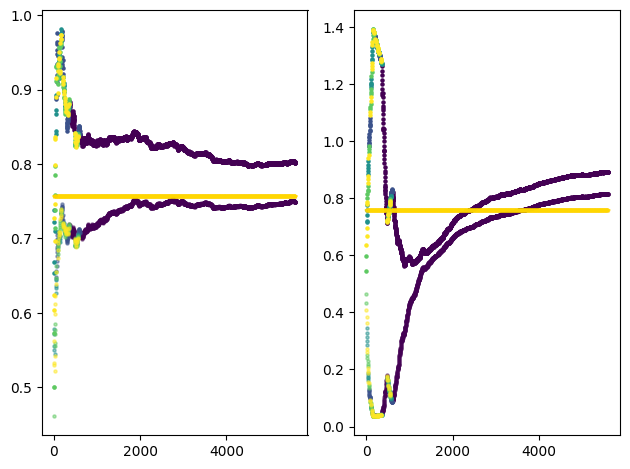

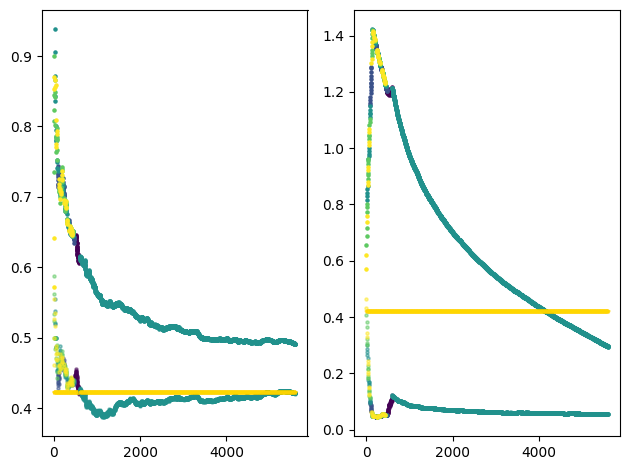

In [21]:
# fig, ax = plt.subplots()
cmap_list = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'summer']
cmap = mpl.colormaps[cmap_list[0]]
for j in range(mab.K):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    time_odd = np.array([i for i in range(1, len(estimate_hists[j]), 2)])
    opt_odd = np.array([estimate_hists[j][i][1]+bonus_hists[j][i][1] for i in range(1, len(estimate_hists[j]), 2)])
    est_odd = np.array([estimate_hists[j][i][1] for i in range(1, len(estimate_hists[j]), 2)])
    gt_odd = np.array([ground_truth_hists[j][i][1] for i in range(1, len(estimate_hists[j]), 2)])
    rank_odd = np.array([estimate_hists[j][i][0] for i in range(1, len(estimate_hists[j]), 2)])
    new_time_odd = np.array([i for i in range(1, len(new_estimate_hists[j]), 2)])
    new_opt_odd = np.array([new_estimate_hists[j][i][1]+new_bonus_hists[j][i][1] for i in range(1, len(new_estimate_hists[j]), 2)])
    new_est_odd = np.array([new_estimate_hists[j][i][1] for i in range(1, len(new_estimate_hists[j]), 2)])
    new_gt_odd = np.array([new_ground_truth_hists[j][i][1] for i in range(1, len(new_estimate_hists[j]), 2)])
    new_rank_odd = np.array([new_estimate_hists[j][i][0] for i in range(1, len(new_estimate_hists[j]), 2)])
    for pos in np.unique(rank_odd):
        ix = np.where(rank_odd == pos)
        if pos == -1:
            ax[0].scatter(time_odd[ix], opt_odd[ix], color='grey', alpha=0.1, s=5, label=pos)
            ax[0].scatter(time_odd[ix], est_odd[ix], color='grey', alpha=0.1, s=5)
            ax[0].scatter(time_odd[ix], gt_odd[ix], marker="*", c='gold', alpha=0.2, s=5)
        else:
            ax[0].scatter(time_odd[ix], opt_odd[ix], color= cmap(pos/4), alpha=1, s=5, label=pos)
            ax[0].scatter(time_odd[ix], est_odd[ix], color= cmap(pos/4), alpha=0.5, s=5)
            ax[0].scatter(time_odd[ix], gt_odd[ix], marker="*", c='gold', alpha=0.2, s=5)
    for pos in np.unique(new_rank_odd):
        ix = np.where(new_rank_odd == pos)
        if pos == -1:
            ax[1].scatter(new_time_odd[ix], new_opt_odd[ix], color='grey', alpha=0.1, s=5, label=pos)
            ax[1].scatter(new_time_odd[ix], new_est_odd[ix], color='grey', alpha=0.1, s=5)
            ax[1].scatter(new_time_odd[ix], new_gt_odd[ix], marker="*", c='gold', alpha=0.2, s=5)
        else:
            ax[1].scatter(new_time_odd[ix], new_opt_odd[ix], color= cmap(pos/4), alpha=1, s=5, label=pos)
            ax[1].scatter(new_time_odd[ix], new_est_odd[ix], color= cmap(pos/4), alpha=0.5, s=5)
            ax[1].scatter(new_time_odd[ix], new_gt_odd[ix], marker="*", c='gold', alpha=0.2, s=5)
    fig.tight_layout()

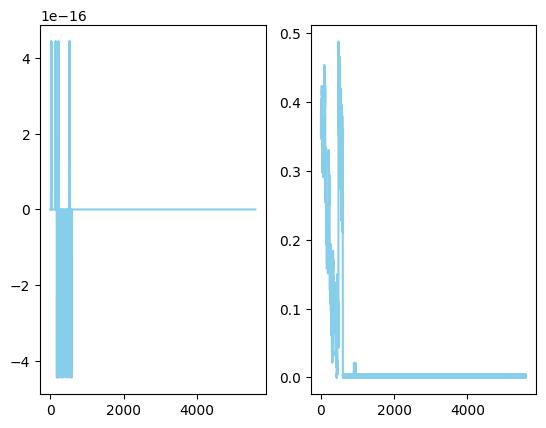

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(regret_hist, c='skyblue')
ax[1].plot(new_regret_hist, c='skyblue')

# Logistic Contextual Bandits with Ranking Automated ECOLog Average Experiment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils_logistic import LogisticRewardHistoryRanking, LogisticContextualBanditRanking, AutoExperimentRanking, AverageAutoExperiment

In [ ]:
experiment = AverageAutoExperiment(K=5, top_k=None, horizon=500, warm_up=3,
                                   mab_class=LogisticContextualBanditRanking, 
                                   hist_class=LogisticRewardHistoryRanking, 
                                   runner_class=AutoExperimentRanking,
                                   seeds=50)

In [ ]:
reward, regret = experiment.run()

In [ ]:
plt.plot(regret[0])